In [1]:
__nbid__ = '0007'
__author__ = 'Jonah Medoff <jmedoff@uchicago.edu>, Alice Jacques <alice.jacques@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['delve_dr2']
__keywords__ = ['science example', 'dwarf galaxies'] 

# Detectando la galaxia enana Centaurus I en DELVE DR2
*Jonah Medoff*

*Adaptado de "Detecting the Hydra II dwarf galaxy in SMASH DR1" por Robert Nikutta, Stéphanie Juneau, Knut Olsen, David Nidever, & Astro Data Lab Team*

#### (_Traducción de [DwarfGalaxiesInDelveDr2.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DwarfGalaxies/DwarfGalaxiesInDelveDr2.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen del notebook](#goals)
* [Avisos Legales y atribuciones](#attribution)
* [Imports y configuración](#import)
* [Autenticación](#auth)
* [Consultar el catálogo DELVE para estrellas azules (esperadas en enanas pobres en metales)](#query)
* [Gráfico de densidad espacial](#spatial)
* [Detectar sobredensidades (núcleos Gaussianos diferenciales)](#kernel)
* [Identificar máximos](#peaks)
* [Inspeccionar los recortes de imagen alrededor de los máximos (Simple Image Access)](#sia)
* [Diagramas CM de todas las estrellas alrededor de los máximos](#cmdiagrams)
* [Guardar los resultados en un archivo local](#savefile)
* [Recursos](#resource)

<a class="anchor" id="goals"></a>
# Objetivos

Usaremos un algoritmo de detección de galaxias enanas basado en una sobredensidad espacial de estrellas azules para redescubrir la galaxia enana Centaurus I en el dataset DELVE DR2 ([Mau et al. 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...890..136M/abstract)).

# Resumen

**Contexto**
Las galaxias enanas ultrafluidas son cruciales para comprender muchos aspectos del universo. Por ejemplo, están dominadas por materia oscura; su localización en el espacio puede así trazar la estructura a gran escala de la distribución de materia oscura. Además, se sospecha que las galaxias enanas albergan agujeros negros de masa intermedia (IMBH), que hasta ahora han eludido los esfuerzos por encontrarlos. Los IMBHs conectan naturalmente el vacío entre los agujeros negros de masa solar y los agujeros negros supermasivos que residen en el centro de prácticamente todas las galaxias grandes.

**Recuperación de datos**
Recuperaremos datos en AR=189.58 y Dec=-40.89 en el catálogo DELVE ([Drlica-Wagner et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220316565D/abstract)) y buscaremos sobredensidades de objetos azules.

Las columnas requeridas son AR, Dec y las magnitudes g, r, i.

**Detección**
Convolucionaremos la distribución espacial de nuestro dataset con un par de núcleos Gaussianos y restaremos los resultados, como se hace por ejemplo en [Stanford et al. (2005, ApJ, 634, 2, L129)](http://adsabs.harvard.edu/abs/2005ApJ...634L.129S) (cúmulos de galaxias), o [Koposov et al. (2008, ApJ, 686, 279)](http://adsabs.harvard.edu/abs/2008ApJ...686..279K) (satélites de la Vía Láctea). Esto tiene el efecto de convolucionar la distribución espacial con un filtro sombrero mexicano, útil para detectar objetos a una escala espacial deseada.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

Para este notebook específicamente, por favor reconozca: 
* Documentos DELVE:[Mau et al. 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...890..136M/abstract), [Drlica-Wagner et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220316565D/abstract)

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:
* DELVE papers: [Mau et al. 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...890..136M/abstract), [Drlica-Wagner et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220316565D/abstract)

# Importaciones y configuración

In [1]:
# Librerías estándar
from getpass import getpass
import warnings
warnings.filterwarnings('ignore') # Suprimir algunas advertencias de deprecación de astropy

# De 3ros
import numpy as np
from numpy.core.defchararray import startswith, count
from astropy import utils, io, convolution, stats
from astropy.visualization import make_lupton_rgb, simple_norm
from photutils import find_peaks
from pyvo.dal import sia
import pylab as plt
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

# De Data Lab
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert

# Configuración por omisión de gráficas
plt.rcParams['font.size'] = 14

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

 <a class="anchor" id="query"></a>
# Consultar el catálogo DELVE para estrellas azules (esperadas en enanas pobres en metales)

Consultaremos la tabla de fotometría del catálogo DELVE DR2 y seleccionaremos ra=189.58 y dec=-40.89. Limitaremos la consulta para escoger objetos azules (-0.4 < g-r < 0.4).

## Construir la cadena de consulta

In [2]:
ra = 189.58
dec = -40.89

# Crear la cadena de consulta; comandos SQL en mayúsculas para claridad

consulta =\
"""SELECT ra,dec,mag_auto_g,mag_auto_r,mag_auto_i
   FROM delve_dr2.objects
   WHERE q3c_radial_query(ra, dec, 189.58, -40.89, 0.5) AND
         mag_auto_g BETWEEN 14 AND 25 AND
         (mag_auto_g - mag_auto_r) BETWEEN -0.4 AND 0.4""".format(ra, dec)

# Enviar la consulta
Ejecutar la consulta en modo sincrónico es muy fácil.

In [3]:
%time
R = qc.query(sql=consulta,fmt='pandas') # R es un DataFrame de pandas

CPU times: user 1 µs, sys: 2 µs, total: 3 µs
Wall time: 7.63 µs


In [4]:
print("Número de objetos:", R.shape[0])
print(R.head())

Número de objetos: 2978
           ra        dec  mag_auto_g  mag_auto_r  mag_auto_i
0  189.261247 -41.323464   21.527279   21.489342   21.411541
1  189.307640 -41.324229   22.742039   22.548280   22.021933
2  189.438062 -41.378271   21.589127   21.209211   21.158897
3  189.443497 -41.374310   21.653559   21.291859   21.216507
4  189.441928 -41.367302   23.944675   24.169296   24.210217


<a class="anchor" id="spatial"></a>
# Gráfico de densidad espacial

Podrías detectar una sobredensidad ya.

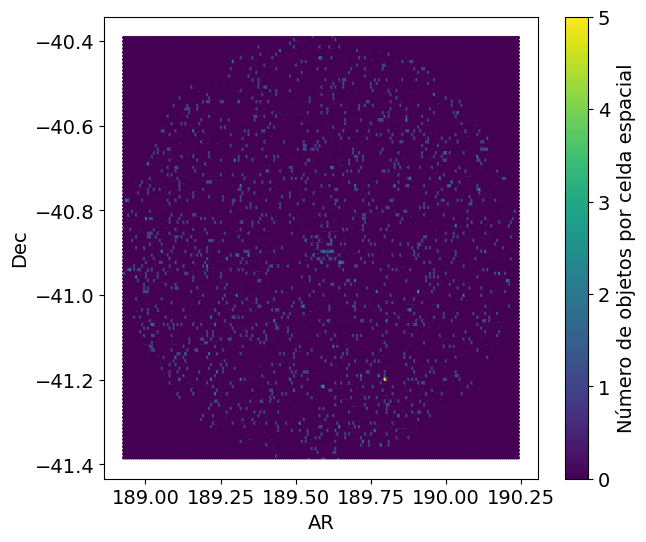

In [5]:
fig = plt.figure(figsize=(7,6))
plt.hexbin(R['ra'], R['dec'],gridsize=200)
plt.xlabel('AR')
plt.ylabel('Dec')
plt.colorbar(label='Número de objetos por celda espacial');

<a class="anchor" id="kernel"></a>
# Detectar sobredensidades (núcleos Gaussianos diferenciales)
Aquí definimos el filtro para galaxias enanas como una convolución diferencial de una imagen bidimensional usando dos núcleos Gaussianos; esto tiene el efecto de una convolución con un filtro sombrero mexicano. Los núcleos por omisión buscan objetos a la escala de unos pocos minutos de arco. La salida incluye un array recortado de la distribución espacial convolucionada, que utilizaremos para la detección de máximos.

In [6]:
def filtro_de_enanas (ra,dec,fwhm_small=2.0,fwhm_big=20):

    """Convolución diferencial con núcleos Gaussianos 2D.
    
       Basado en Koposov et al. (2008).
       Código por Ken Mighell y Mike Fitzpatrick.
       Pequeñas modificaciones por RN.
       
       Parámetros
       ----------
       ra, dec : float o array
           AR & Dec en grados.
    
       fwhm_small, fwhm_big : float
           Tamaños de la anchura completa a la mitad del máximo (FWHM) de los núcleos Gaussianos pequeño y grande
           a usar en la convolución, en minutos de arco.
    """
    
    x, y = ra, dec

    print("Calculando convolución diferencial .... ",)

    # Información sobre declinación (y) [grados]
    ymean = (y.min() + y.max()) / 2.0
    ydiff_arcmin = (y.max() - y.min()) * 60.0 # convertir de grados a minutos de arco

    # Información sobre ascensión recta (x) [grados en tiempo]:
    xdiff = x.max() - x.min() # separación angular [grados (tiempo)] 
    xmean = (x.min() + x.max()) / 2.0

    # Convertir de grados en tiempo a separación en grados angulares:
    xdiff_angular = (x.max() - x.min()) * np.cos(ymean*(np.pi/180.0))

    # Convertir de grados a minutos de arco
    xdiff_angular_arcmin = xdiff_angular * 60.0 

    # Obtener el número de píxeles de un minuto de arco en las direcciones X e Y:
    nx = np.rint(xdiff_angular_arcmin).astype('int')
    ny = np.rint(ydiff_arcmin).astype('int')

    # Crear un histograma bidimensional de los conteos crudos:
    Counts, xedges, yedges  = np.histogram2d (x, y, (nx,ny) )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    raw_hist = np.rot90(Counts).copy() # truco para manejar rarezas de Python

    # Crear los núcleos Gaussianos pequeño y grande con una desviación estándar
    # de la FWHM dada en píxeles de minutos de arco^2.
    kernel_small = convolution.Gaussian2DKernel(fwhm_small/2.35,factor=1)
    kernel_big = convolution.Gaussian2DKernel(fwhm_big/2.35,factor=1)

    # Calcular la convolución diferencial de los núcleos.
    conv_big = convolution.convolve(raw_hist, kernel_big)
    conv_small = convolution.convolve(raw_hist, kernel_small)
    conv_delta = conv_small - conv_big
    delta = conv_delta.copy()

    # Calcular estadísticas y el piso
    mean = np.mean(delta, dtype='float64')
    sigma = np.std(delta, dtype='float64')
    sigmaRaw = np.std(raw_hist,dtype='float64')
    median = np.median(delta) # no usado
    floor = mean

    print('filtro_de_enanas: mean = {:g}  sigma = {:g} sigmaRaw = {:g}'.format(mean, sigma, sigmaRaw))

    clipped = delta.copy()
    clipped[delta < floor] = floor

    # Retornar los campos calculados.
    return raw_hist, extent, delta, clipped, sigma

# Ejecutar el filtro de galaxias enanas
Usaremos los núcleos de convolución por omisión de 2 y 20 minutos de arco de tamaño.

In [7]:
%time
small_k, big_k = 2., 20.  # Tamaños de los núcleos en minutos de arco
raw, extent, delta, clipped, dsigma = filtro_de_enanas(R['ra'],R['dec'],fwhm_small=small_k,fwhm_big=big_k)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs
Calculando convolución diferencial .... 
filtro_de_enanas: mean = 0.116196  sigma = 0.451999 sigmaRaw = 1.07089


# Graficar el histograma 2D convolucionado

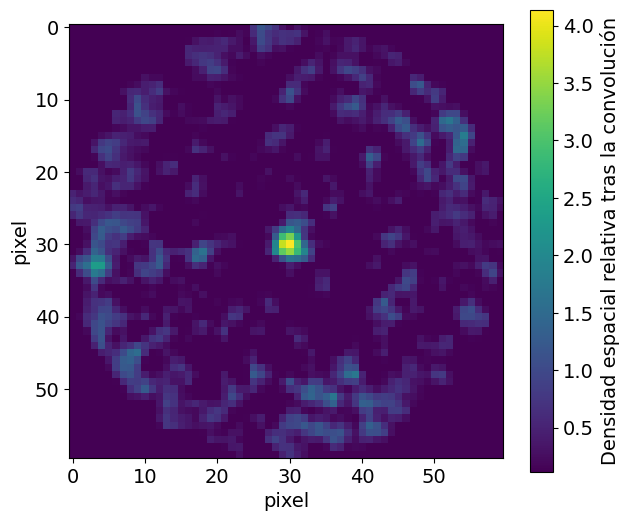

In [8]:
fig, ax = plt.subplots(figsize=(7,6))
im = plt.imshow(clipped)
plt.xlabel('pixel')
plt.ylabel('pixel')
plt.colorbar(label='Densidad espacial relativa tras la convolución');

**Se observa un máximo denso, vamos a localizarlo automáticamente...**

<a class="anchor" id="peaks"></a>
# Identificar máximos
Usaremos el paquete `photutils` para identificar máximos de 3-sigma en la imagen filtrada recortada.

In [9]:
# Encontrar máximos
mean, median, std = stats.sigma_clipped_stats(clipped,sigma=3.0,maxiters=5)
print(mean, median, std)
tbl = find_peaks(clipped,median+3,box_size=small_k*2)

# Agregar posiciones de AR & Dec de los máximos encontrados
a, b = extent[:2]
xvec = np.arange(a,b,(b-a)/clipped.shape[1])
a, b = extent[2:]
yvec = np.arange(a,b,(b-a)/clipped.shape[0])

tbl['ra'] = xvec[tbl['x_peak']]
tbl['dec'] = yvec[-tbl['y_peak']-1]
print(tbl)

0.157117870232365 0.11619622055078048 0.08005803782621333
x_peak y_peak     peak_value            ra               dec        
------ ------ ----------------- ----------------- ------------------
    30     30 4.137728039557334 189.5845272303593 -40.90449882873472


# Mostrar los máximos de densidad identificados

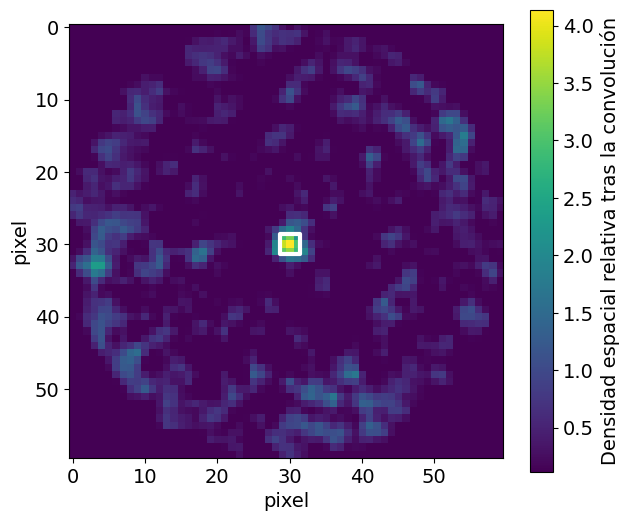

In [10]:
ecs = ['w'] # Color del marco de el recuadro
ax.scatter(tbl['x_peak'],tbl['y_peak'],marker='s',s=tbl['peak_value']*50,c='none',edgecolors=ecs,lw=3) # Sigue escribiendo en ax previo
fig  # Repite la figura (actualizada)

<a class="anchor" id="sia"></a>
# Inspeccionar los recortes de imagen alrededor de los máximos
# *Servicio de Acceso Simple de Imágnes (SIA por sus siglas en inglés)*
Data Lab viene con todo incluido. Los servicios de recorte y descarga de imágenes están incorporados.

Descargaremos imágenes desde la url "https://datalab.noirlab.edu/sia/nsa" en nuestro AR y Dec específicos y las almacenaremos en una tabla de imágenes, además escribiremos una función para graficar varias imágenes lado a lado.

In [11]:
# Configurar SIA y tabla de imágenes
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)
ra = 189.58
dec = -40.89
fov = 0.1

imgTable = svc_nsa.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()
   
# Graficador de imágenes multi-panel
def graficar_imagenes(images,geo=None,panelsize=5,titles=list('gri'),cmap=plt.cm.gray_r):
    if geo is None:
        geo = (len(images),1)  # ncols, nrows
        
    fig = plt.figure(figsize=(geo[0]*panelsize,geo[1]*panelsize))
    for j,img in enumerate(images):
        ax = fig.add_subplot(geo[1],geo[0],j+1)
        ax.imshow(img,origin='lower',interpolation='none',cmap=cmap,norm=plt.mpl.colors.PowerNorm(0.1))
        ax.set_title('{:s}'.format(titles[j]))
        plt.axis('off')

# Obtener imágenes para el recuadro blanco

Graficar separadamente las imágenes g, r e i para la región en el recuadro blanco.

Para cada imagen, se usa la condición sel para encontrar la imagen específica dentro de la tabla de imágenes. Por razones estéticas, normalizamos cada imagen usando el tiempo de exposición y el zeropoint de la imagen. Tomamos los zeropoints del procesamiento de datos DELVE, pero pueden aproximarse manualmente (como hacemos para la banda i).

In [12]:
# Hay un desplazamiento astrométrico en la imagen de falso color, así que se usan estas constantes para mover las imágenes
# Actualmente tenemos configurado que las imágenes g e i se muevan 8 píxeles a la izquierda

a=0
b=8

In [13]:
sel = (imgTable['proctype'].astype(str)=='InstCal') & (imgTable['prodtype'].astype(str)=='image') & (imgTable['access_estsize'].astype(str)=='311551') & \
    (startswith(imgTable['obs_bandpass'].astype(str),'g'))
#print(imgTable[sel][0])

row = imgTable[sel][0]
url = row['access_url'] # Obtener la URL de descarga
filename = download_file(url,cache=True,show_progress=False,timeout=120)
hdu = fits.open(filename)[0]
i1 = hdu.data
hdr = hdu.header
wcs = WCS(hdr)
# Las dimensiones de cada imagen deben ser iguales
image1 = i1[0:1362, b:1233]
# Normalización
# image1 *= (10.0**(0.4*(30.0 - zpt)))/exptime
#  del encabezado, exptime=85, expnum=188187, ccdnum=16

zp=31.514652
image1 *= (10.0**(0.4*(30.0-zp)))/hdr["EXPTIME"]

0.0015444942 153.20056 (1362, 1225)


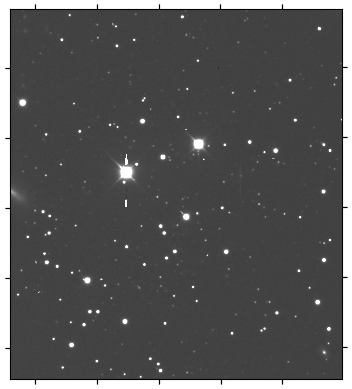

In [14]:
print(image1.min(),image1.max(),image1.shape)
ax = plt.subplot(projection=wcs)
ax.imshow(image1,cmap='gray',vmin=image1.min(),vmax=image1.min()+(image1.max()-image1.min())/150.)
plt.show()

In [15]:
sel = (imgTable['proctype'].astype(str)=='InstCal') & (imgTable['prodtype'].astype(str)=='image') & (imgTable['access_estsize'].astype(str)=='313152') & \
    (startswith(imgTable['obs_bandpass'].astype(str),'r')) 
#print(imgTable[sel][0])

row = imgTable[sel][0]
url = row['access_url'] # obtener el URL de descarga
filename = download_file(url,cache=True,show_progress=False,timeout=120)
hdu = fits.open(filename)[0]
i2 = hdu.data
hdr = hdu.header
wcs = WCS(hdr)
# Dimensiones de cada  imagen tienen que ser iguales
image2 = i2[0:1362, 0:1233-b]
#Normalization
#image2 *= (10.0**(0.4*(30.0 - zpt)))/exptime
#from header, exptime=85, expnum=188186, ccdnum=16
zp=31.66765
image2 *= (10.0**(0.4*(30.0-zp)))/hdr["EXPTIME"]

0.04137251 131.84407 (1362, 1225)


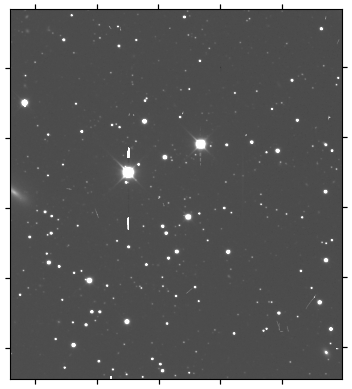

In [16]:
print(image2.min(),image2.max(),image2.shape)
ax = plt.subplot(projection=wcs)
ax.imshow(image2,cmap='gray',vmin=image2.min(),vmax=image2.min()+(image2.max()-image2.min())/70.)
plt.show()

In [17]:
sel = (imgTable['proctype'].astype(str)=='InstCal') & (imgTable['prodtype'].astype(str)=='image') & (imgTable['access_estsize'].astype(str)=='307960') & \
    (startswith(imgTable['obs_bandpass'].astype(str),'i'))
#print(imgTable[sel][0])

row = imgTable[sel][0]
url = row['access_url'] # get the download URL
filename = download_file(url,cache=True,show_progress=False,timeout=120)
hdu = fits.open(filename)[0]
i3 = hdu.data
hdr = hdu.header
wcs = WCS(hdr)
# Las dimensiones de cada imagen deben ser iguales
image3 = i3[0:1362, b:1233]
# Normalización
# image3 *= (10.0**(0.4*(30.0 - zpt)))/exptime
# del encabezado, exptime=20, expnum=294524, ccdnum=60
# Nota: el expnum y ccdnum de la imagen i no produjeron un zeropoint,
# así que estimamos un zeropoint de 31.0, que funcionó bien para producir una imagen de falso color adecuada.
zp=31.0
image3 *= (10.0**(0.4*(30.0-zp)))/hdr["EXPTIME"]

10.76793 550.08356 (1362, 1225)


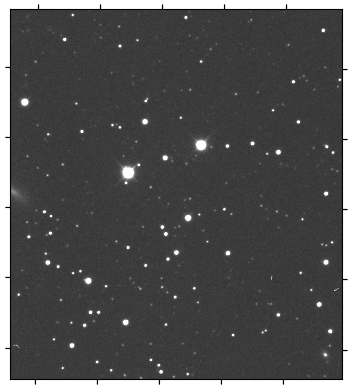

In [18]:
print(image3.min(),image3.max(),image3.shape)
ax = plt.subplot(projection=wcs)
ax.imshow(image3,cmap='gray',vmin=image3.min(),vmax=image3.min()+(image3.max()-image3.min())/100.)
plt.show()

# Crear una imagen de 3 bandas en color falso
Usar la función `make_lupton_rgb` para combinar las imágenes g, r e i en una imagen de 3 bandas en color falso.

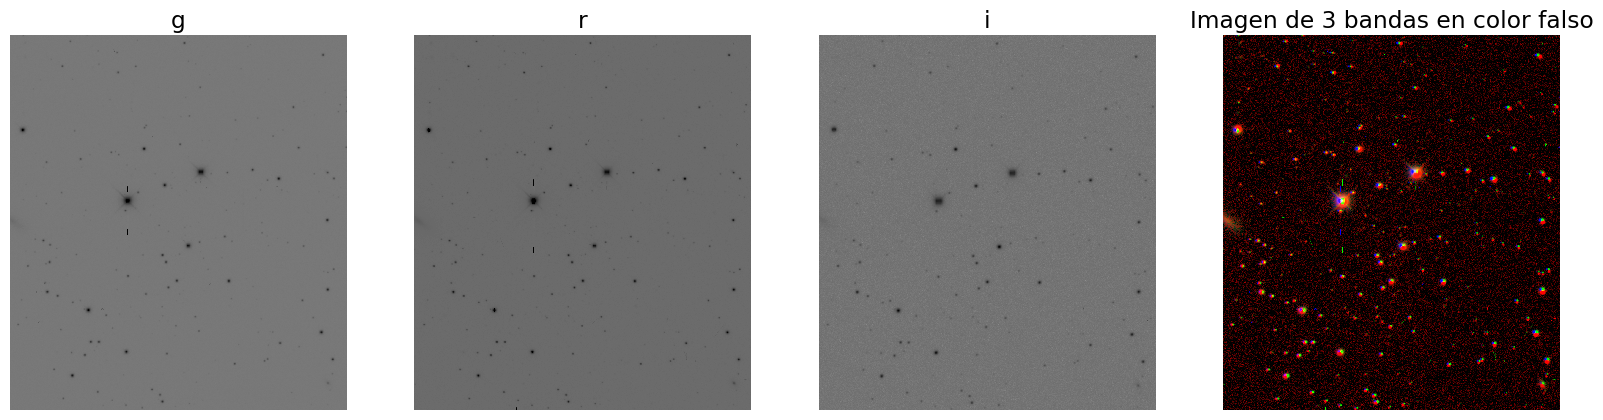

In [19]:
bands = list('gri')
images=[image1, image2, image3]
images = [im-np.median(im) for im in images] # Restar la mediana de todas las imágenes para mejor escala
images += [make_lupton_rgb(*images[::-1],stretch=1)] # Agregar una imagen compuesta de 3 colores
graficar_imagenes(images,geo=(4,1),titles=bands+['Imagen de 3 bandas en color falso'])

<a class="anchor" id="cmdiagrams"></a>
# Consultar la base de datos para estrellas cerca del máximo
Obtener la fotometría de estrellas dentro de un radio de 5 minutos de arco del máximo de densidad.

In [20]:
def crear_consulta(ra0,dec0,radius0):
    query_template = """
SELECT ra,dec,mag_auto_g,mag_auto_r,mag_auto_i FROM delve_dr2.objects
  WHERE q3c_radial_query(ra, dec, {0}, {1}, {2})
    AND mag_auto_g BETWEEN 14 AND 25""" 
    query = query_template.format(ra0,dec0,radius0)
    
    return query

In [21]:
consulta0 = crear_consulta(tbl['ra'][0],tbl['dec'][0], 5./60.) # AR y Dec Centrales
R0 = qc.query(sql=consulta0,fmt='pandas')
print(R0.head()) # Un método Pandas

           ra        dec  mag_auto_g  mag_auto_r  mag_auto_i
0  189.526334 -40.974901   23.137787   22.216522   22.119255
1  189.534045 -40.975292   23.097633   21.711887   21.064604
2  189.529183 -40.974057   24.786463   23.506096   23.684706
3  189.521272 -40.970934   21.012383   19.464642   18.525452
4  189.516410 -40.969993   19.250240   18.589230   18.379360


# Calcular color

In [22]:
R0['g_r'] = R0['mag_auto_g'] - R0['mag_auto_r']
print( R0.head())

           ra        dec  mag_auto_g  mag_auto_r  mag_auto_i       g_r
0  189.526334 -40.974901   23.137787   22.216522   22.119255  0.921265
1  189.534045 -40.975292   23.097633   21.711887   21.064604  1.385746
2  189.529183 -40.974057   24.786463   23.506096   23.684706  1.280367
3  189.521272 -40.970934   21.012383   19.464642   18.525452  1.547741
4  189.516410 -40.969993   19.250240   18.589230   18.379360  0.661010


# Diagramas color-magnitud del máximo

In [23]:
def graficar_panel(axid,x,y,title='',xlim=(-1,2),ylim=(25.2,14)):
    ax = fig.add_subplot(axid)
    ax.scatter(x,y,marker='.',s=10, alpha=0.8)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)

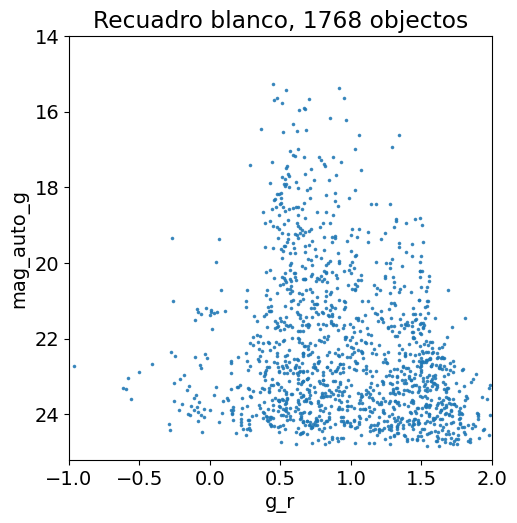

In [24]:
fig = plt.figure(figsize=(12,5.5))
graficar_panel(121,R0['g_r'],R0['mag_auto_g'],'Recuadro blanco, {:d} objectos'.format(len(R0)))

Comparar con la Figura 3 de [Mau et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...890..136M/abstract)

<a class="anchor" id="savefile"></a>
# Guardar tu tabla de fotometría
Si deseas, ahora puedes guardar tu tabla de fotometría de Centaurus I en un archivo local y llevártela contigo.

In [25]:
outfile = 'cen1.csv'
R0.to_csv(outfile,index=False)

[cen1.csv](cen1.csv) <-- Descarga el archivo como desees.

# Algunas ideas para mejorar

* Buscar sobredensidades en otros lugares (¡por todas partes!)

* Optimizar tamaños de los núcleos, cálculos, wavelets apropiados

<a class="anchor" id="resource"></a>
# Algunos recursos
Mau et al. (2020, ApJ, 890, 136) "Two Ultra-Faint Milky Way Stellar Systems Discovered in Early Data from the DECam Local Volume Exploration Survey": https://ui.adsabs.harvard.edu/abs/2020ApJ...890..136M/abstract

Drlica-Wagner et al. (2022) "The DECam Local Volume Exploration Survey Data Release 2": https://ui.adsabs.harvard.edu/abs/2022arXiv220316565D/abstract

Stanford et al. (2005, ApJ, 634, 2, L129) "An IR-selected Galaxy Cluster at z = 1.41": http://adsabs.harvard.edu/abs/2005ApJ...634L.129S

Koposov et al. (2008, ApJ, 686, 279) "The Luminosity Function of the Milky Way Satellites": http://adsabs.harvard.edu/abs/2008ApJ...686..279K